In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", delimiter= ",")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
cat_col = list(df.dtypes[df.dtypes == 'object'].index)
for c in cat_col:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [12]:
#converting total charges from object type to numeric
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')
tc.isnull().sum()

11

In [14]:
df[tc.isnull()] [['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [16]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isnull().sum()

0

In [18]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

In [20]:
#coverting churn to binary
df['churn_bin'] = (df.churn == 'yes').astype(int)
df.churn_bin

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn_bin, Length: 7043, dtype: int32

In [22]:
#splitting dataset using sklearn
#refer to implementation of linear regression for manual split
from sklearn.model_selection import train_test_split

In [23]:
#70-30 split for training and testing
df_train, df_test = train_test_split(df, test_size= 0.3, random_state= 1)
len(df_train), len(df_test)

(4930, 2113)

In [26]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [28]:
y_train = df_train.churn_bin.values 
y_test = df_test.churn_bin.values

df.shape[0] == len(y_train) + len(y_test)

True

In [30]:
#feature selection
numerical_vars = df.select_dtypes(include =['int64','float64'])
categorical_vars = df.select_dtypes(include=['object'])

numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [32]:
df_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [34]:
from IPython.display import display
#determining the mean, count, churn diff and risk ratio for all categorical vars
for c in categorical:
    df_group = df_train.groupby(c).churn_bin.agg(['mean', 'count'])
    df_group['diff'] = df_train.churn_bin.mean() - df_group['mean']
    df_group['risk'] = df_group['mean']/df_train.churn_bin.mean()
    display(df_group)

,mean,count,diff,risk
gender,,,,
female,0.277030,2451,-0.005022,1.018461
male,0.267043,2479,0.004965,0.981747


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242798,4131,0.029210,0.892614
1,0.423029,799,-0.151021,1.555206


,mean,count,diff,risk
partner,,,,
no,0.331656,2584,-0.059648,1.219288
yes,0.206309,2346,0.065700,0.758465


,mean,count,diff,risk
dependents,,,,
no,0.315245,3483,-0.043237,1.158956
yes,0.167934,1447,0.104074,0.617385


,mean,count,diff,risk
phoneservice,,,,
no,0.246835,474,0.025173,0.907456
yes,0.274686,4456,-0.002678,1.009844


,mean,count,diff,risk
multiplelines,,,,
no,0.255804,2369,0.016204,0.940428
no_phone_service,0.246835,474,0.025173,0.907456
yes,0.296119,2087,-0.024111,1.088640


,mean,count,diff,risk
internetservice,,,,
dsl,0.197024,1680,0.074984,0.724331
fiber_optic,0.424437,2177,-0.152429,1.560385
no,0.080149,1073,0.191859,0.294657


,mean,count,diff,risk
onlinesecurity,,,,
no,0.422873,2457,-0.150865,1.554635
no_internet_service,0.080149,1073,0.191859,0.294657
yes,0.154286,1400,0.117722,0.567210


,mean,count,diff,risk
onlinebackup,,,,
no,0.404412,2176,-0.132404,1.486764
no_internet_service,0.080149,1073,0.191859,0.294657
yes,0.223081,1681,0.048927,0.820128


,mean,count,diff,risk
deviceprotection,,,,
no,0.398430,2166,-0.126422,1.464774
no_internet_service,0.080149,1073,0.191859,0.294657
yes,0.231815,1691,0.040193,0.852237


,mean,count,diff,risk
techsupport,,,,
no,0.420859,2445,-0.148851,1.547229
no_internet_service,0.080149,1073,0.191859,0.294657
yes,0.160057,1412,0.111951,0.588426


,mean,count,diff,risk
streamingtv,,,,
no,0.344196,1964,-0.072187,1.265387
no_internet_service,0.080149,1073,0.191859,0.294657
yes,0.305864,1893,-0.033856,1.124465


,mean,count,diff,risk
streamingmovies,,,,
no,0.342009,1921,-0.070001,1.257350
no_internet_service,0.080149,1073,0.191859,0.294657
yes,0.308884,1936,-0.036876,1.135570


,mean,count,diff,risk
contract,,,,
month-to-month,0.431452,2728,-0.159443,1.586172
one_year,0.122605,1044,0.149403,0.450742
two_year,0.031088,1158,0.240920,0.114291


,mean,count,diff,risk
paperlessbilling,,,,
no,0.175150,2004,0.096858,0.643914
yes,0.338346,2926,-0.066338,1.243882


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.173132,1057,0.098877,0.636494
credit_card_(automatic),0.166974,1084,0.105034,0.613857
electronic_check,0.455918,1656,-0.183910,1.676119
mailed_check,0.195940,1133,0.076068,0.720346


In [36]:
from sklearn.metrics import mutual_info_score
#displaying mutal info scores for each categorical var in descending order
def mut_info_churn_score(series):
    return mutual_info_score(series, df_train.churn_bin)

mi = df_train[categorical].apply(mut_info_churn_score)
mi.sort_values(ascending= False)

contract            0.095584
onlinesecurity      0.062868
techsupport         0.061018
internetservice     0.054367
onlinebackup        0.045686
deviceprotection    0.043365
paymentmethod       0.042050
streamingtv         0.031593
streamingmovies     0.031427
paperlessbilling    0.016845
dependents          0.012096
seniorcitizen       0.010384
partner             0.010012
multiplelines       0.001090
phoneservice        0.000173
gender              0.000063
dtype: float64

In [38]:
#determining the correlation of churn with all three numerical vars
df_train[numerical].corrwith(df_train.churn_bin)

tenure           -0.347831
monthlycharges    0.194976
totalcharges     -0.191520
dtype: float64

In [40]:
# we will select all num features
new_num = ['tenure', 'monthlycharges', 'totalcharges', 'seniorcitizen']
#for categorical vals
#selecting categorical features with MI >= 0.04
#selecting features with low MI but high churn rate-- like seniorcitizen
new_cat = ['contract', 'onlinesecurity', 'techsupport',
           'internetservice', 'onlinebackup', 'deviceprotection',
           'paymentmethod', 'dependents']

In [42]:
one_hot_cols = {
    'contract' : ['month-to-month'],
    'onlinesecurity' : ['no'],
    'techsupport' : ['no'],
    'internetservice' : ['fiber_optic'],
    'onlinebackup' : ['no'],
    'deviceprotection' : ['no'],
    'paymentmethod' : ['electronic_check'],
    'dependents' : ['no']
}

In [180]:
def feature_eng(df, scaler = None):
    #numerical features
    new_num = ['tenure', 'monthlycharges', 'totalcharges', 'seniorcitizen']
    df_new = df[new_num].copy()

    if scaler is None:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        df_new[['tenure', 'monthlycharges','totalcharges']] = scaler.fit_transform(df_new[['tenure', 'monthlycharges','totalcharges']])
    else:
        df_new[['tenure', 'monthlycharges','totalcharges']] = scaler.transform(df_new[['tenure', 'monthlycharges','totalcharges']])

    #categorical features
    one_hot_cols = {
    'contract' : ['month-to-month'],
    'onlinesecurity' : ['no'],
    'techsupport' : ['no'],
    'internetservice' : ['fiber_optic'],
    'onlinebackup' : ['no'],
    'deviceprotection' : ['no'],
    'paymentmethod' : ['electronic_check'],
    'dependents' : ['no']
    }
    
    for col, categs in one_hot_cols.items():
        if col in df.columns:
            for cat in categs:
                colname = f"{col}_{cat}"
                df_new[colname] = (df[col] == cat).astype(int)
    df_final = np.column_stack([np.ones(df_new.shape[0]), df_new])
    return df_final, scaler

In [182]:
feature_eng(df_train)

(array([[ 1.        , -0.49748235,  0.12975533, ...,  1.        ,
          1.        ,  1.        ],
        [ 1.        ,  1.49818033,  1.29989652, ...,  0.        ,
          1.        ,  0.        ],
        [ 1.        , -0.82330483,  0.51980239, ...,  1.        ,
          1.        ,  1.        ],
        ...,
        [ 1.        , -0.17165987,  1.35798864, ...,  0.        ,
          1.        ,  1.        ],
        [ 1.        , -1.23058292, -0.34494024, ...,  1.        ,
          0.        ,  1.        ],
        [ 1.        , -0.66039359,  0.11481736, ...,  1.        ,
          0.        ,  0.        ]]),
 StandardScaler())

In [186]:
feature_eng(df_test)

(array([[ 1.        ,  0.33642586,  0.5052014 , ...,  0.        ,
          0.        ,  1.        ],
        [ 1.        ,  1.3541613 ,  1.25681565, ...,  1.        ,
          0.        ,  1.        ],
        [ 1.        , -0.84414724, -0.65638426, ...,  1.        ,
          0.        ,  1.        ],
        ...,
        [ 1.        , -0.47776249,  1.070162  , ...,  0.        ,
          0.        ,  1.        ],
        [ 1.        ,  1.51699897, -0.20974874, ...,  0.        ,
          0.        ,  0.        ],
        [ 1.        ,  0.49926353,  0.29521604, ...,  1.        ,
          0.        ,  1.        ]]),
 StandardScaler())

In [122]:
#initialize weights randomly such that shape is features,1
#input X.shape
#output w 
def init_weights(x):
    size = x.shape[1]
    w = np.zeros((size,))
    return w

In [124]:
#score(X,w)
#out: z = x.dot.(w)
def z(x,w):
    z = x.dot(w)
    return z

In [126]:
#sigmoid(z)
#input z
#out y_pred (0-1)
def sigmoid(z):
    z = np.clip(z, -500, 500)
    y_p = 1/(1+np.exp(-z))
    return y_p

In [128]:
#loss(y, y_pred)
#nput: Y, y_pred
#out: loss
def entropy(y, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps)
    entropy = -np.mean(y * np.log(y_pred) + ((1-y) * np.log(1-y_pred)))
    return entropy

In [130]:
#gradient
#input: x, y, y_pred
#out: grad
def grad(x,y,y_pred):
    m = x.shape[0]
    g = (1/m) * (x.T.dot(y_pred - y))
    return g

In [132]:
#update function using update rule
#in: w, grad, a
#out: w
def update(w, grad, a):
    w = w- grad * a
    return w

In [270]:
#training loop
#predict y, compute loss, compute grad, update w using w = w-a * grad
#use N and early stop

def training_loop(x, y, N, alpha):
    w = init_weights(x)
    losses = []
    
    for i in range (N):
        score = z(x, w)
        y_pred = sigmoid(score)
        loss = entropy(y, y_pred)
        gradient = grad(x, y, y_pred)
        losses.append(loss)
        
        #computing gradient norm to use for early stop
        norm = np.linalg.norm(gradient)

        #printing loss every 20 iterations to observe change
        if i % 100 == 0:
            print(f"iter {i}, loss = {loss}")

        w = update (w, gradient, alpha)
        if norm < 1e-4:
            print("converged!")
            break
            
    return w, losses


In [220]:
#applying the model after training
def logistic_reg (x, w_trained):
    score = z(x,w_trained)
    sig = sigmoid(score)
    return sig
    

In [312]:
x_train, scaler = feature_eng(df_train)
x_test, _ = feature_eng(df_test, scaler)

In [320]:
weights, loss_list = training_loop(x_train, y_train, 3000, 0.01)
weights

iter 0, loss = 0.6931471805599453
iter 100, loss = 0.613545812243988
iter 200, loss = 0.5715324466805459
iter 300, loss = 0.5445809465802834
iter 400, loss = 0.5257259440348456
iter 500, loss = 0.5119033317839695
iter 600, loss = 0.5014388617673272
iter 700, loss = 0.49331350227509685
iter 800, loss = 0.4868691752622548
iter 900, loss = 0.4816636570560013
iter 1000, loss = 0.4773904994691673
iter 1100, loss = 0.4738318792336545
iter 1200, loss = 0.47082958131723596
iter 1300, loss = 0.468266514368757
iter 1400, loss = 0.46605458965057156
iter 1500, loss = 0.46412657123972456
iter 1600, loss = 0.46243047445197083
iter 1700, loss = 0.4609256397896894
iter 1800, loss = 0.4595799327713747
iter 1900, loss = 0.45836771517371383
iter 2000, loss = 0.4572683541779569
iter 2100, loss = 0.4562651126145331
iter 2200, loss = 0.4553443131542765
iter 2300, loss = 0.4544947020498228
iter 2400, loss = 0.45370696001310434
iter 2500, loss = 0.45297332280239944
iter 2600, loss = 0.45228728446075783
iter 2

array([-1.41769771, -0.80362806,  0.76655261, -0.26536079,  0.20755738,
        0.18708449,  0.19250226,  0.20732287,  0.13257012, -0.00413449,
       -0.01489472,  0.26794124, -0.34454096])

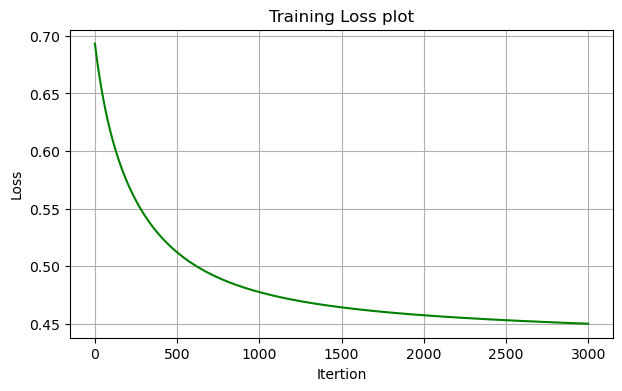

In [322]:
plt.figure(figsize = (7,4))
plt.plot(loss_list, color = "green")
plt.xlabel('Itertion')
plt.ylabel('Loss')
plt.title('Training Loss plot')
plt.grid(True)
plt.show()

In [324]:
#testing
test_pred = logistic_reg(x_test, weights)
test_pred

array([0.1427057 , 0.13317415, 0.30327167, ..., 0.59164715, 0.05523063,
       0.10886034])

In [326]:
#model evaluation
test_class = (test_pred >= 0.5).astype(int)
test_class

array([0, 0, 0, ..., 1, 0, 0])

In [332]:
#quick check
accuracy = (test_class == y_test).mean()
accuracy

0.7983909133932797

In [342]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_class)
cm

array([[1412,  173],
       [ 253,  275]], dtype=int64)

In [346]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_class))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1       0.61      0.52      0.56       528

    accuracy                           0.80      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

